### Cas pratique - Supervised / Unsupervised model

In [ ]:
## Dans ce cours nous allons travailler sur les données du site américain :
## A mesure que nous allons évoluer, nous expliquerons l'étude.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
## chargeons les données contenu dans un fichier txt
## variable - stockage du chemin de lecture | le fichier se trouvant dans le meme dossier de travail, on se contente de citer son  en lieu et place du chemin de lecture
file_path = 'seed_data.txt'
# variable nom de colonnes
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
## lecture de la data dans une dataframe
df = pd.read_csv(file_path, sep = ',', names = cols)

In [29]:
## consultons les cinq (5) premières ligne de la data 
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [30]:
## analysons le contenu d ela colonne class
df['class'].unique()

array(['g', 'h'], dtype=object)

In [ ]:
## la colonne contient deux (2) valeurs modales 'h' :  hardon et 'g' : gamma
## voulons remplacer ces valeurs par des nombre (binaire) 0 et 1

In [31]:
# transformons les caractères de la plage en nombre 'entier' : 0 et 1
## forçons la valeur 1 sur la lettre 'g'
df['class'] = (df['class'] == 'g').astype(int)

In [32]:
## analysons le contenu d ela colonne class
df['class'].unique()

array([1, 0])

In [36]:
## analysons les valeurs null NaN
df.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [ ]:
## aucune valeur manquante remarqué dans le jeu de données - parfait
## ceci est une bonne chose pour commencer l'exploration de notre jeu de données sur le ML

In [ ]:
## C'est quoi le Machine Learning ? 
## le machine learning est un sous domiaine de la science informatique basé sur des algorithmes 
## qui permettent à l'ordinateur d'apprendre de nos données sans avoir à utiliser
## des lignes de codes explicites

## Alors, c'est quoi la différence l'IA ? 
## L'IA est un dommaine de la science informatique dont l'objectif est de rendre les ordinateurs
## et les machines (robots) capables  d'accomplir les tâches humaines et d'immiter les habitudes humaines
## Le machine learning est un sous domaine de l'IA qui essaie de resoudre un problème spécifique 
## faire des prédictions en utilisant les données 

## Types de Machines Learning
## 1 - Supervised learning
## 2 - Unsupervised learning
## 3 - Reinforcement learning

In [38]:
## rappellons la data 
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


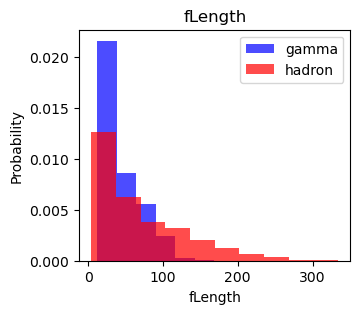

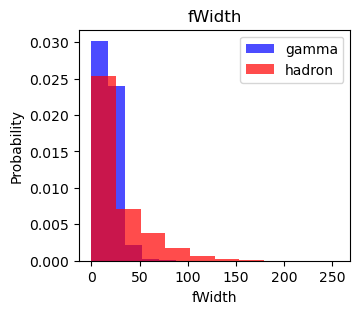

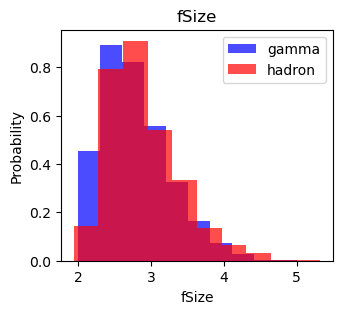

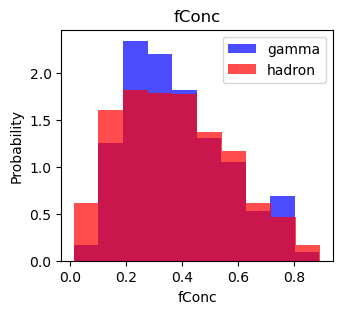

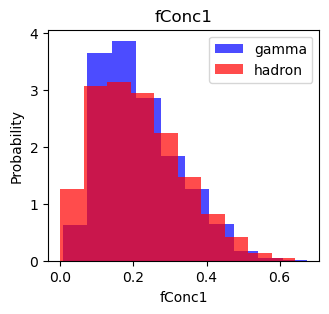

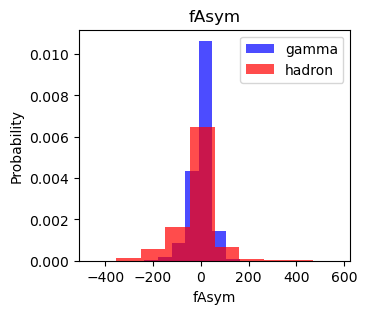

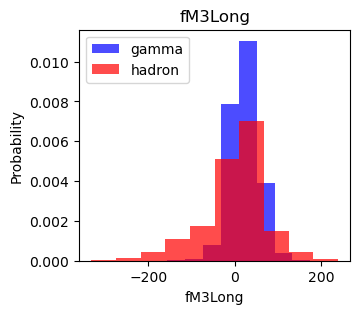

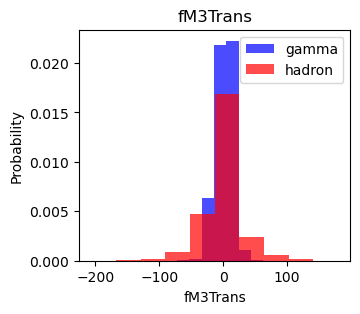

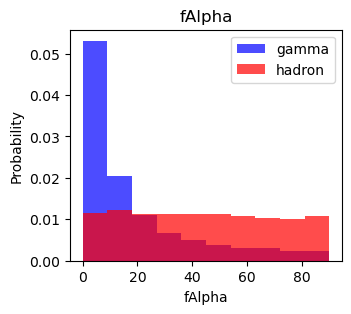

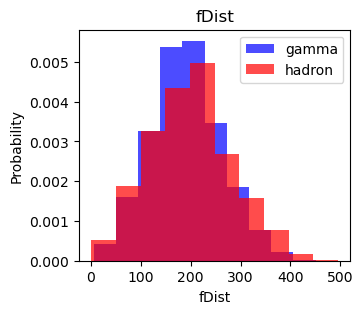

In [44]:
## visualisons toutes la variables 
for label in cols[:-1]:
    plt.figure(figsize=(3.5,3))
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

#### 1 - Train, Validation et le Train dataset

In [48]:
## créyons des variables d'entrainement de la dataset
## a l'aide de la fonction sample pour repartir de façon aléatoire les distribution des données
train, valid, test = np.split(df.sample(frac = 1), [int(0.6*len(df)), int(0.8*len(df))])

In [51]:
## créyons la fonction 
def scale_dataset(dataframe) : 
    x = dataframe[dataframe.cols[:-1]].values
    y = dataframe[dataframe.cols[-1]].values
    